<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/09-Boosted-Trees/03_Sup_Learning_Capstone_Tree_Methods_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Capstone Project - Tree Methods Focus 

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/csv_files/Telco-Customer-Churn.csv')

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [ ]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [ ]:
# CODE HERE
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [ ]:
# CODE HERE
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

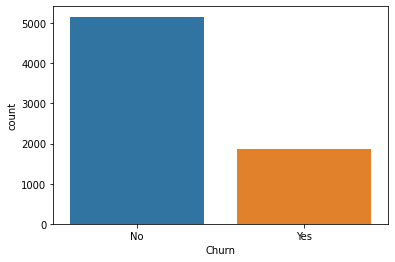

In [ ]:
# CODE HERE
sns.countplot(data=df,x='Churn')

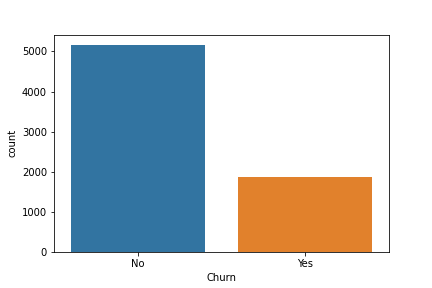

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

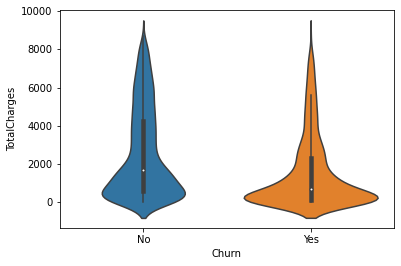

In [ ]:
# CODE HERE
sns.violinplot(x='Churn',y='TotalCharges',data=df)

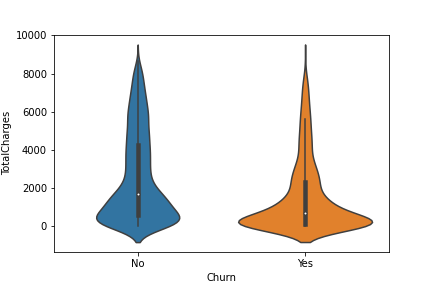<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

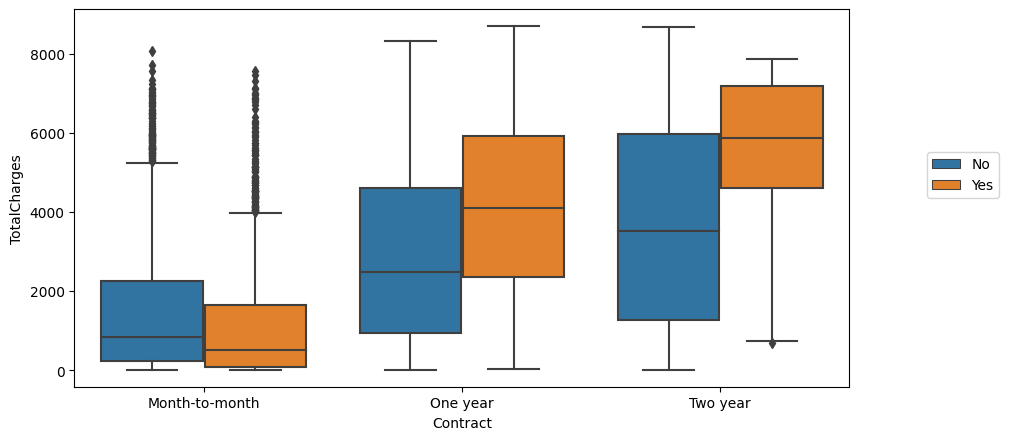

In [ ]:
#CODE HERE
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x='Contract',y='TotalCharges',data=df,hue='Churn')
plt.legend(loc=(1.1,0.5))

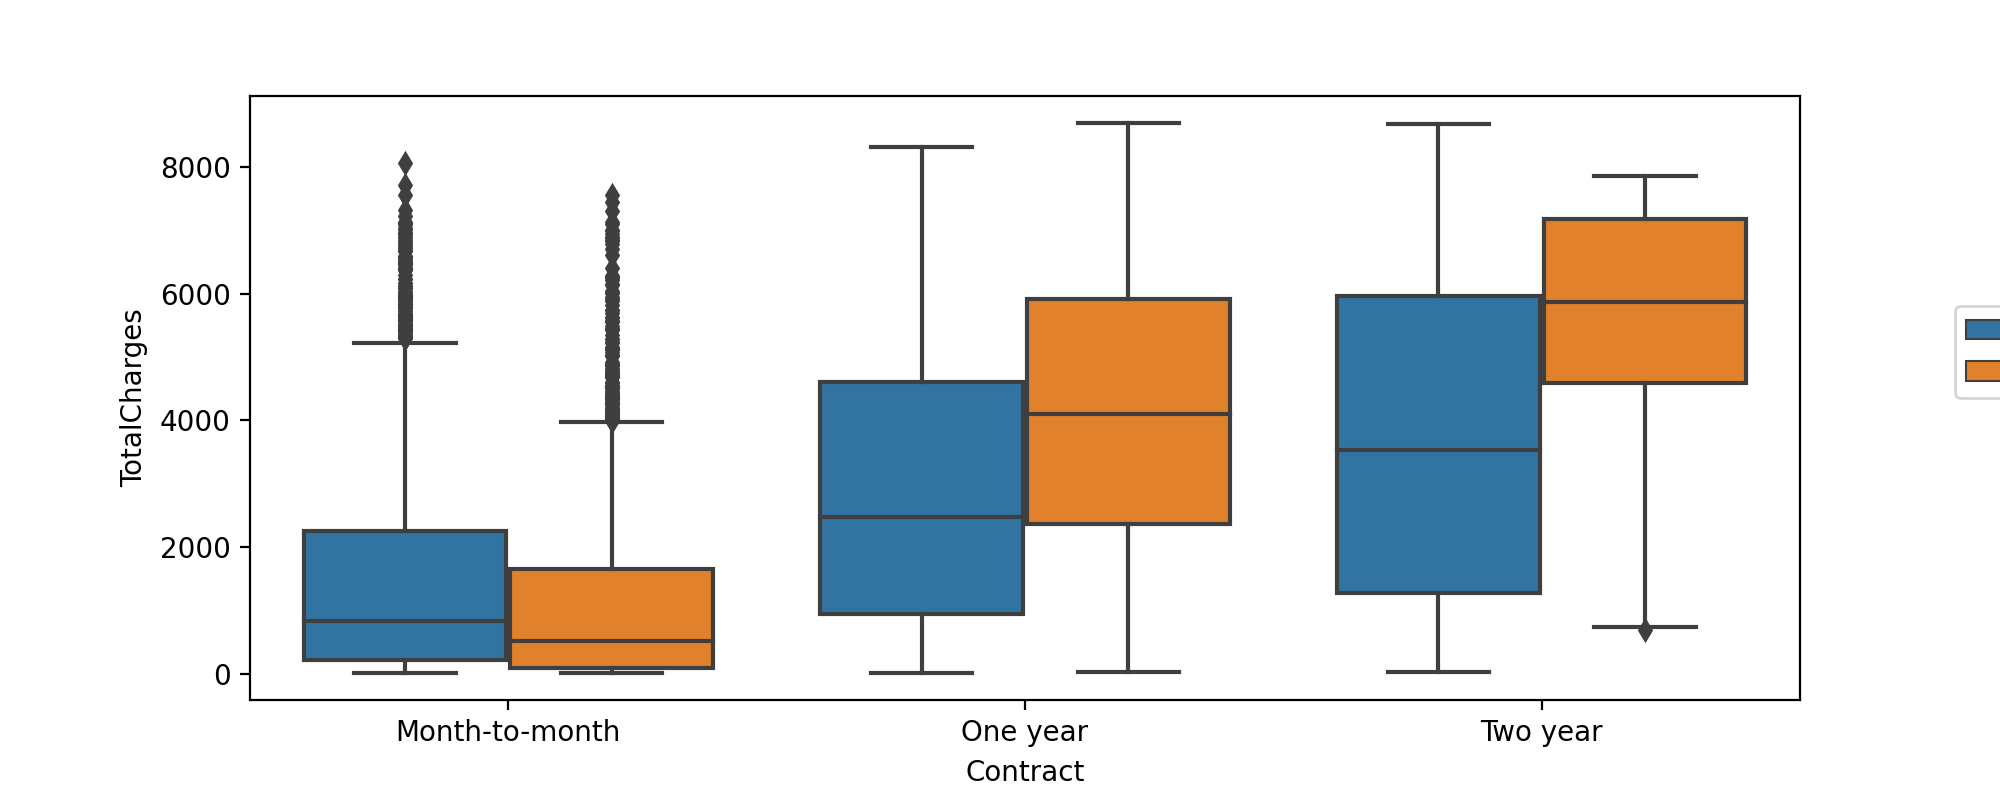<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [ ]:
#CODE HERE
df_var = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [ ]:
df_var.corr()

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn_yes_corr = df_var.corr()['Churn_Yes'].sort_values().iloc[1:-1]

In [ ]:
churn_yes_corr

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

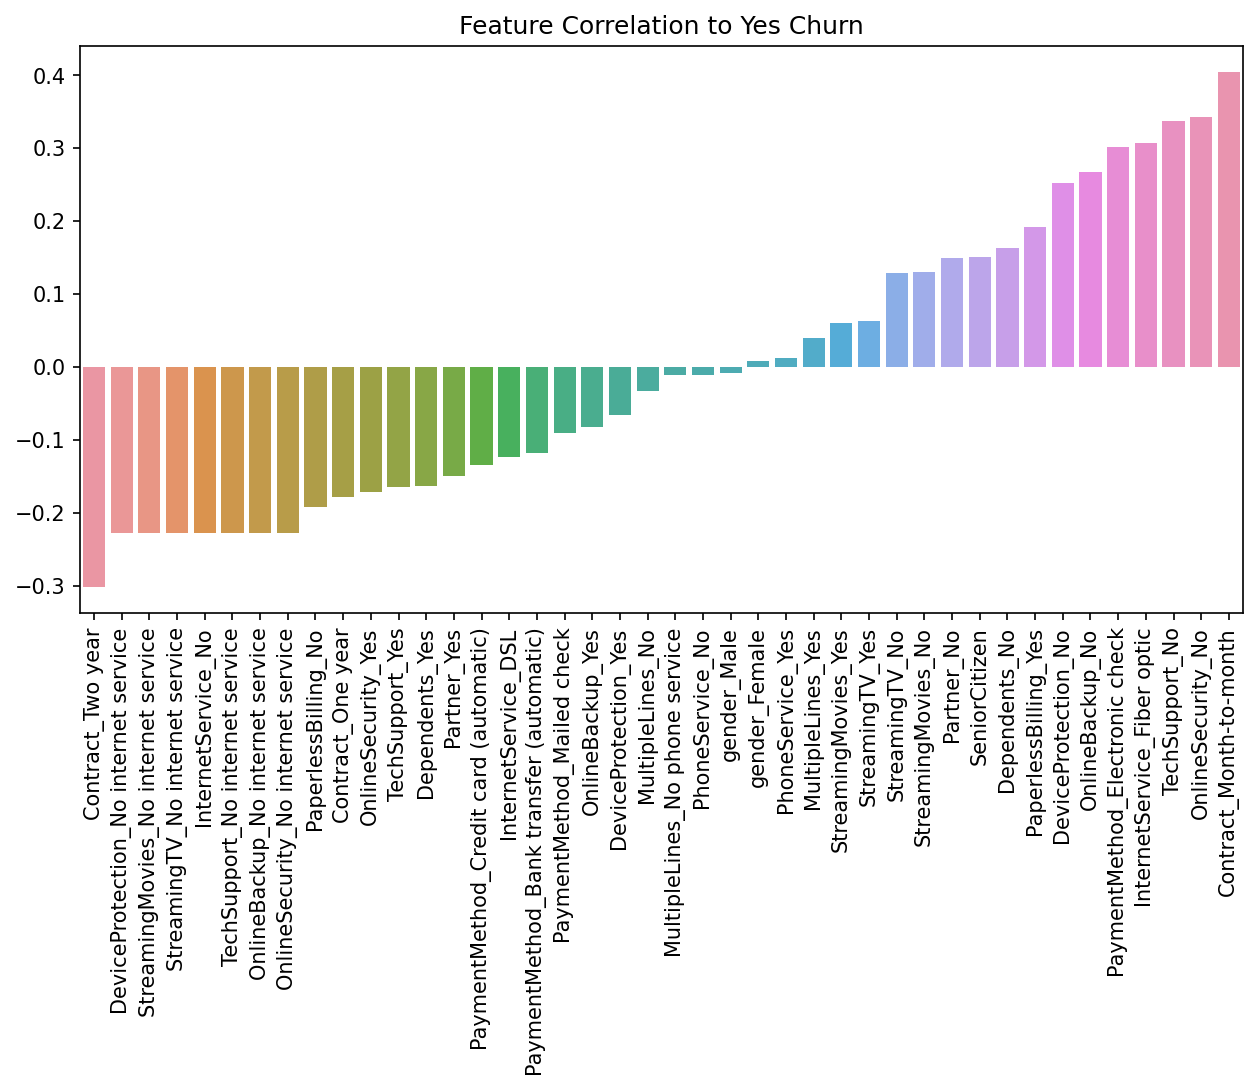

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
sns.barplot(x=churn_yes_corr.index,y=churn_yes_corr.values)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

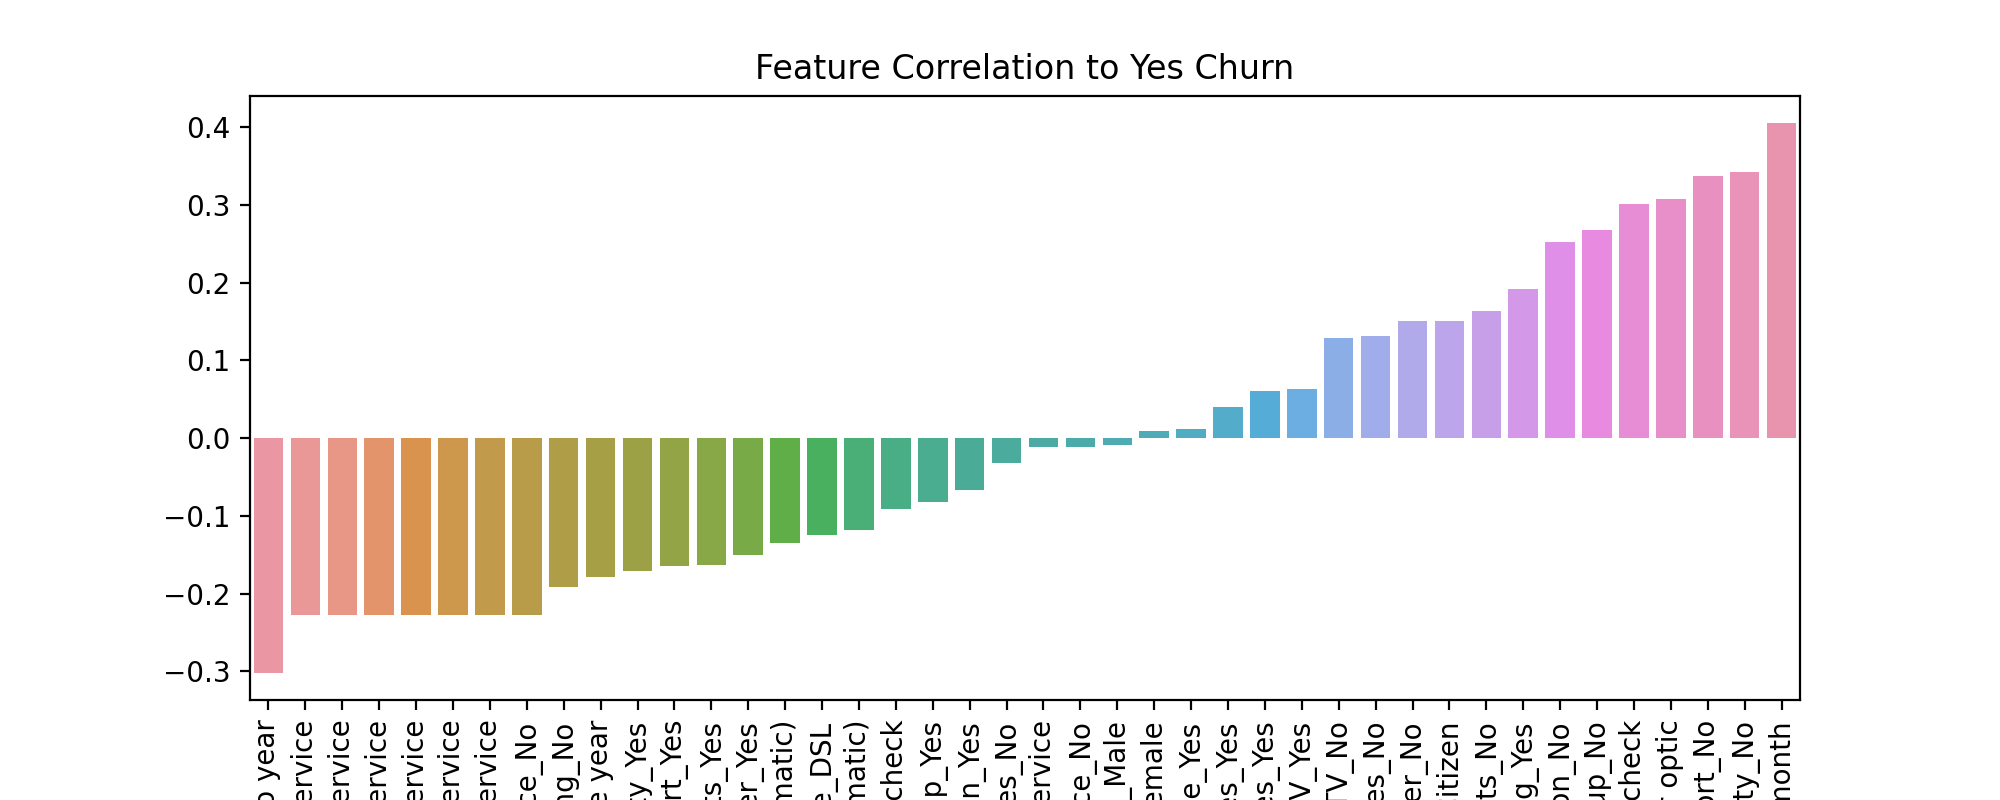<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [ ]:
# CODE HERE
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

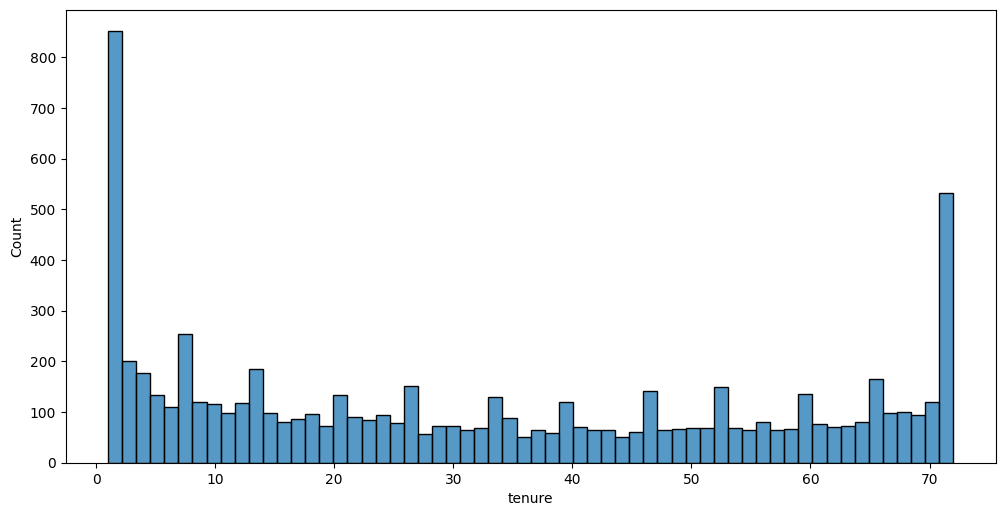

In [ ]:
#CODE HERE
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(x='tenure',data=df,bins=60)

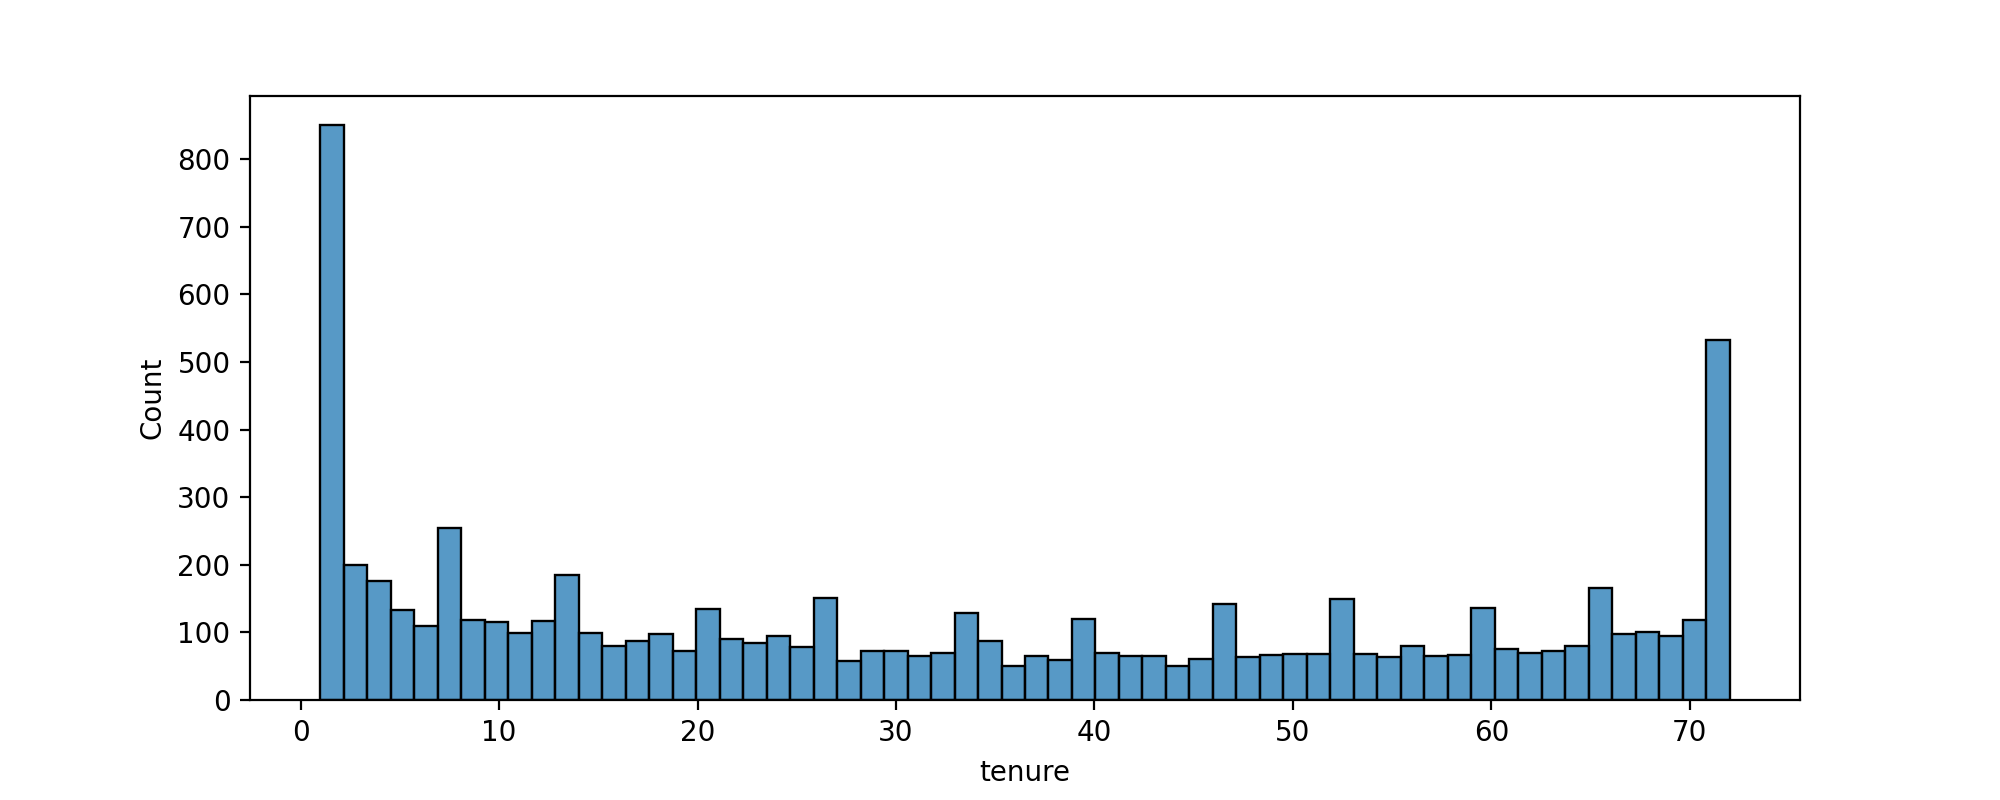<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

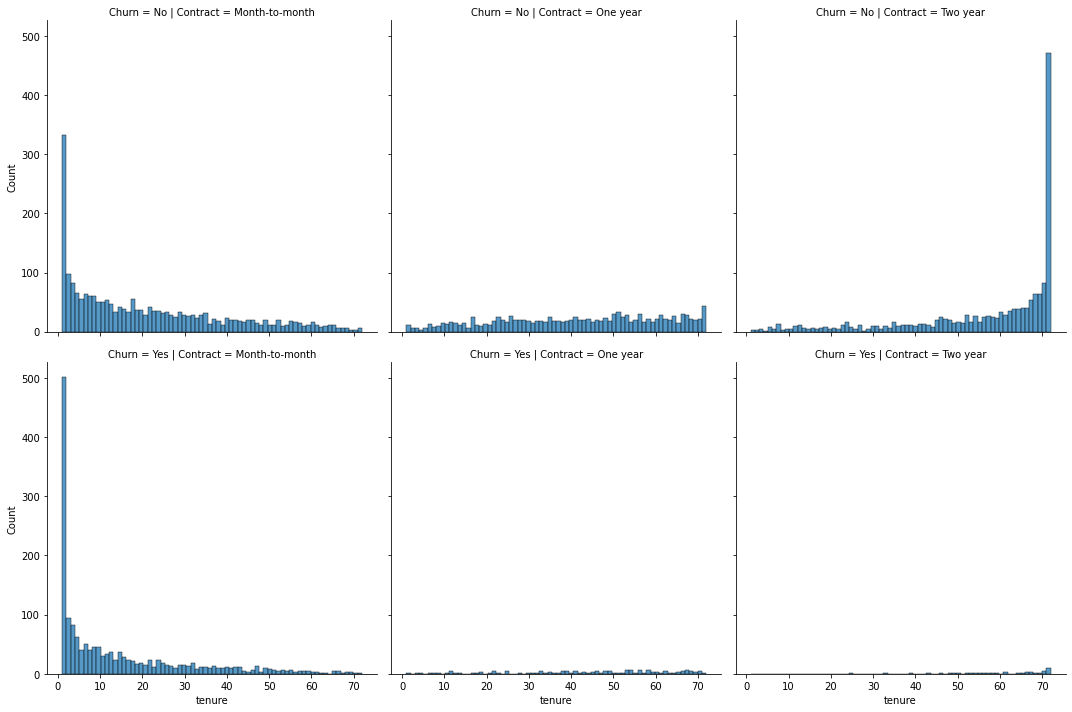

In [ ]:
#CODE HERE
sns.displot(data=df,x='tenure',col='Contract',row='Churn',bins=70)

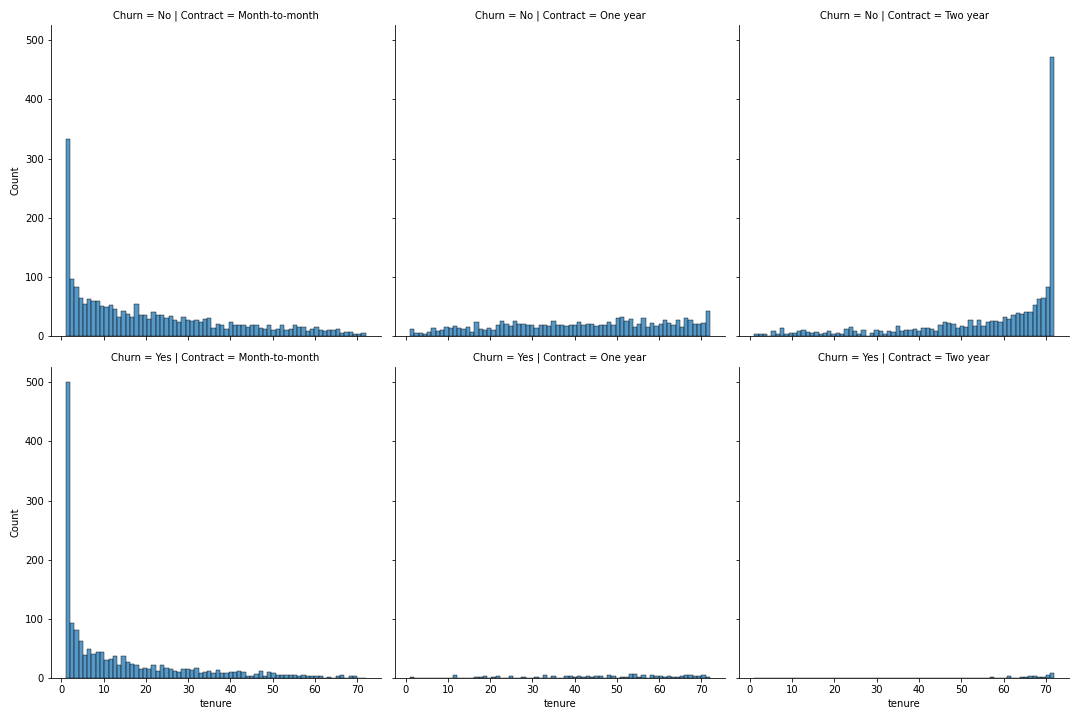<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

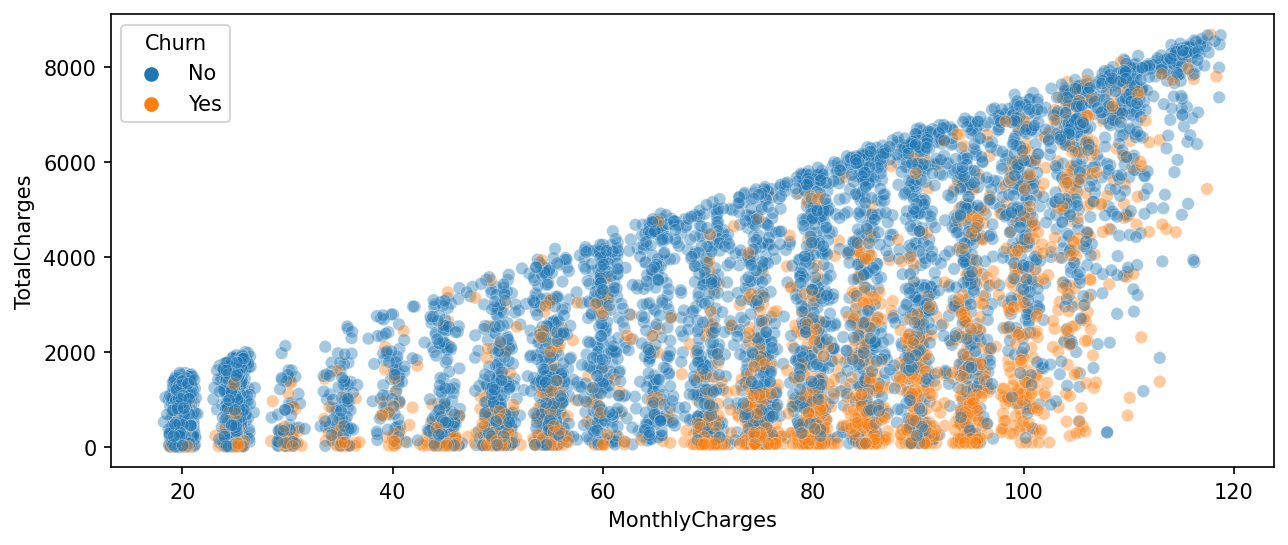

In [ ]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn',alpha=0.4,linewidth=0.3);

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

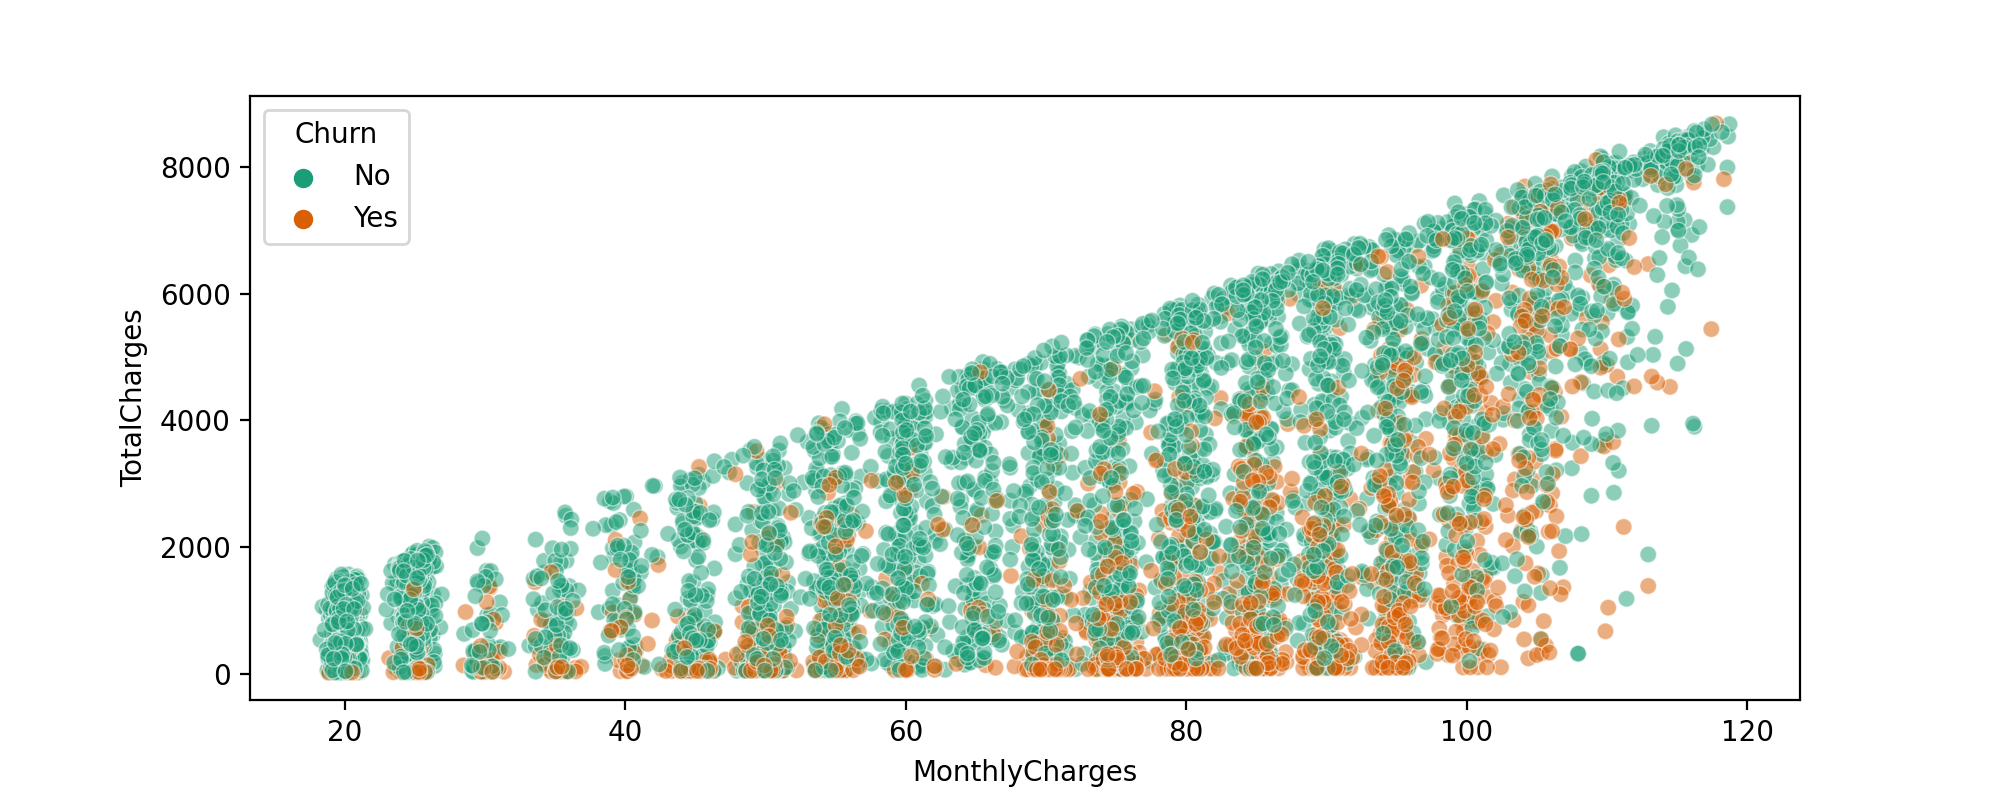<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [ ]:
#CODE HERE
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [ ]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [ ]:
no_churn

tenure             1    2    3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
gender            233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Partner           233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Dependents        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
InternetService   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Contract          233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   

tenure            66  67  68  69   70   71   72  
customerID        76  88  91  87  108  164  356  
gender            76  88  91  87  108  164  356  
SeniorCitizen     76  88  91  87  108  164  356  
Partner           76  88  91  87  108  164  356  
Dependents        76  88  91  87  108  164  356  
PhoneService      76  88  91  87  108  164  356  
MultipleLines     76  88  91  87  108  164  356  
InternetService   76  88  91  87  108  164  356  
OnlineSecurity    76  88  91  87  108  164  356  
OnlineBackup      76  88  91  87  108  164  356  
DeviceProtection  76  88  91  87  108  164  356  
TechSupport       76  88  91  87  108  164  356  
StreamingTV       76  88  91  87  108  164  356  
StreamingMovies   76  88  91  87  108  164  356  
Contract          76  88  91  87  108  164  356  
PaperlessBilling  76  88  91  87  108  164  356  
PaymentMethod     76  88  91  87  108  164  356  
MonthlyCharges    76  88  91  87  108  164  356  
TotalCharges      76  88  91  87  108  164  356  

[19 rows x 72 columns]

In [ ]:
churn_rate = 100*yes_churn /(yes_churn+no_churn)

In [ ]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

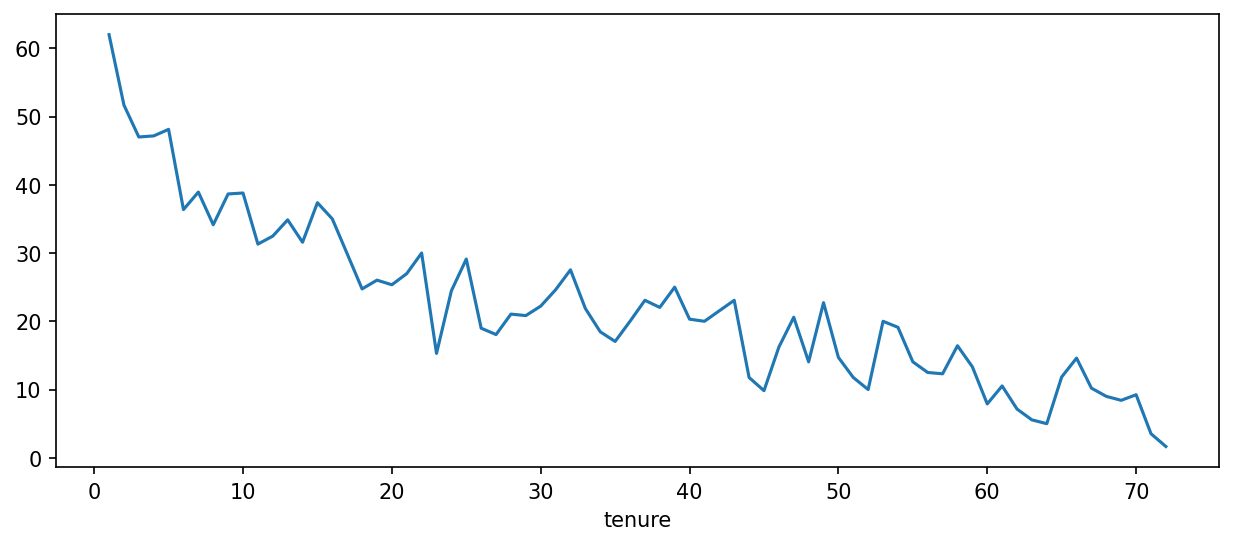

In [ ]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=150)
churn_rate.transpose()['customerID'].plot()

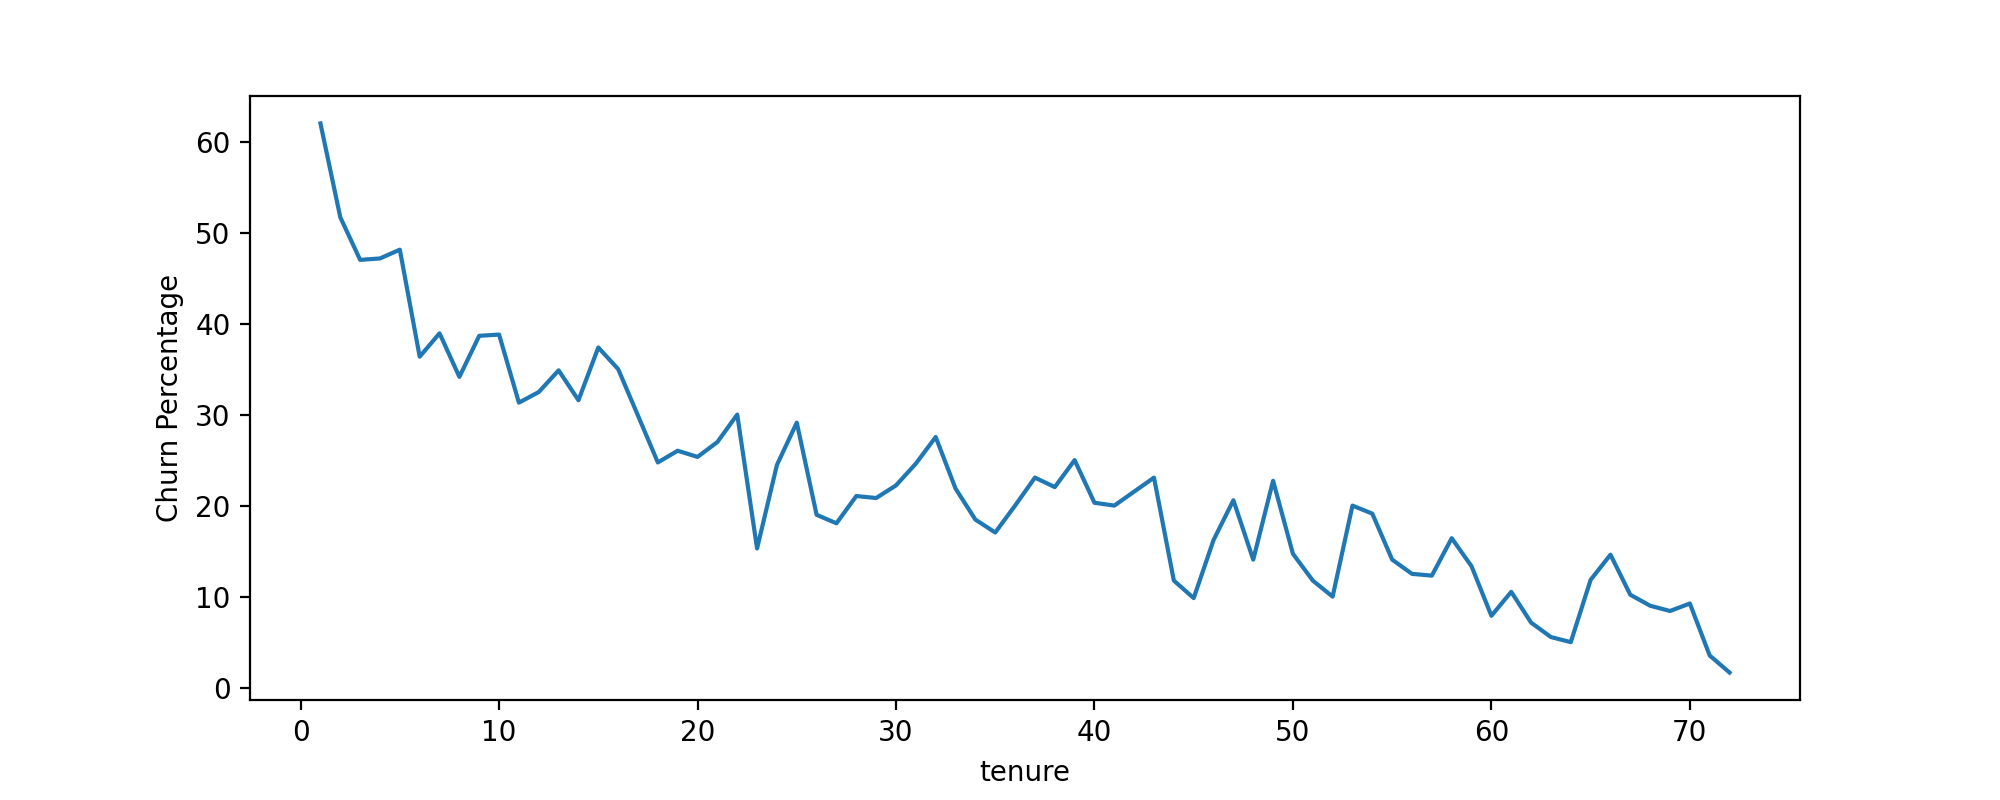<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [4]:
# CODE HERE
def cohort(tenure):
  if tenure<13:
    return '0-12 Months'
  elif tenure < 25:
    return '12-24 Months'
  elif tenure <49:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

In [5]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [ ]:
df[['tenure','Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

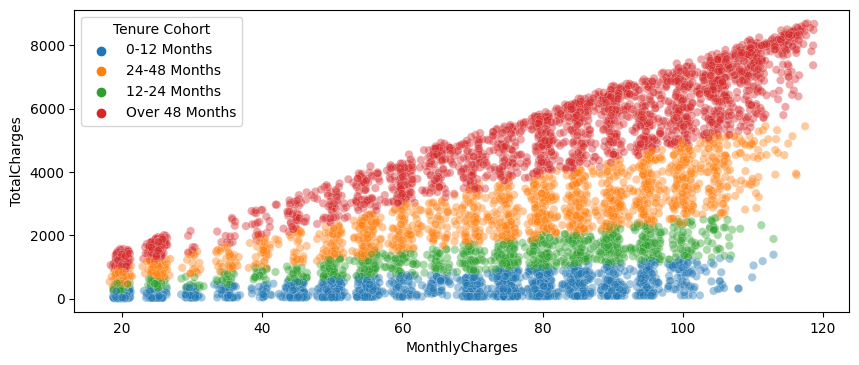

In [ ]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Tenure Cohort',alpha=0.4,linewidth=0.3);

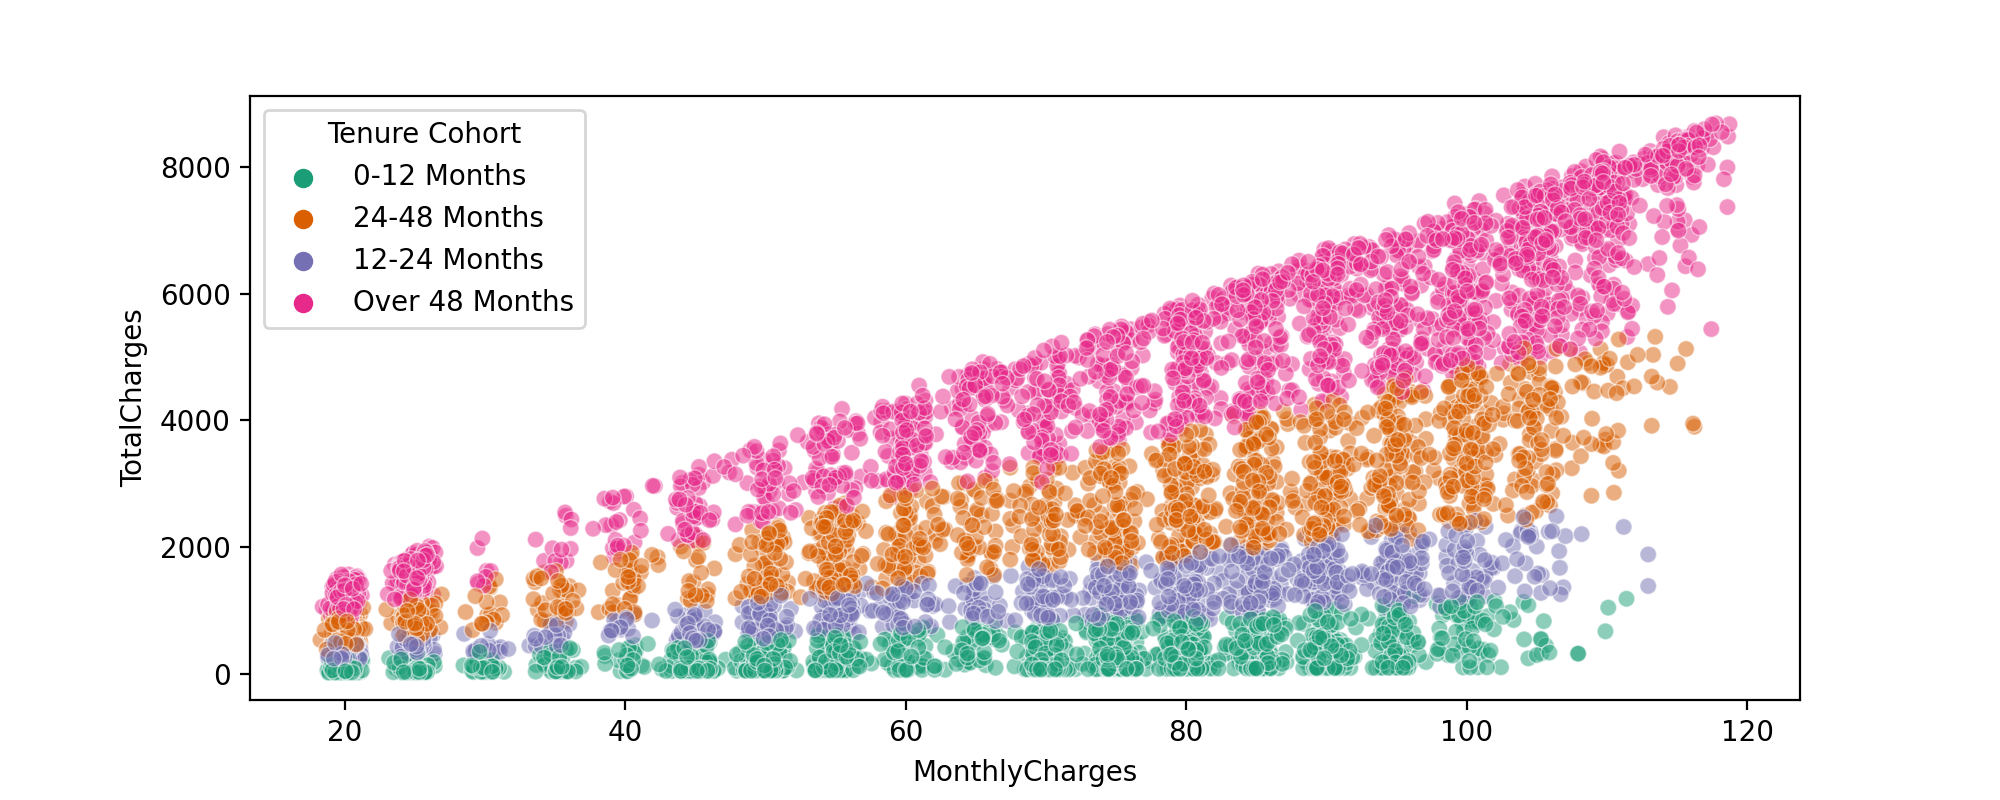<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

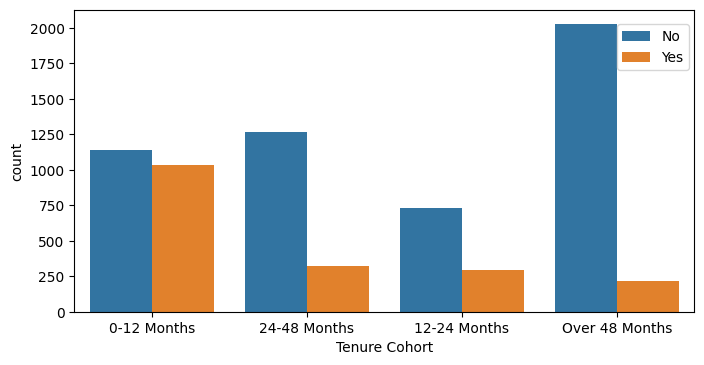

In [ ]:
# CODE HERE
plt.figure(figsize=(8,4),dpi=100)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')
plt.legend(loc=(0.875,0.8));

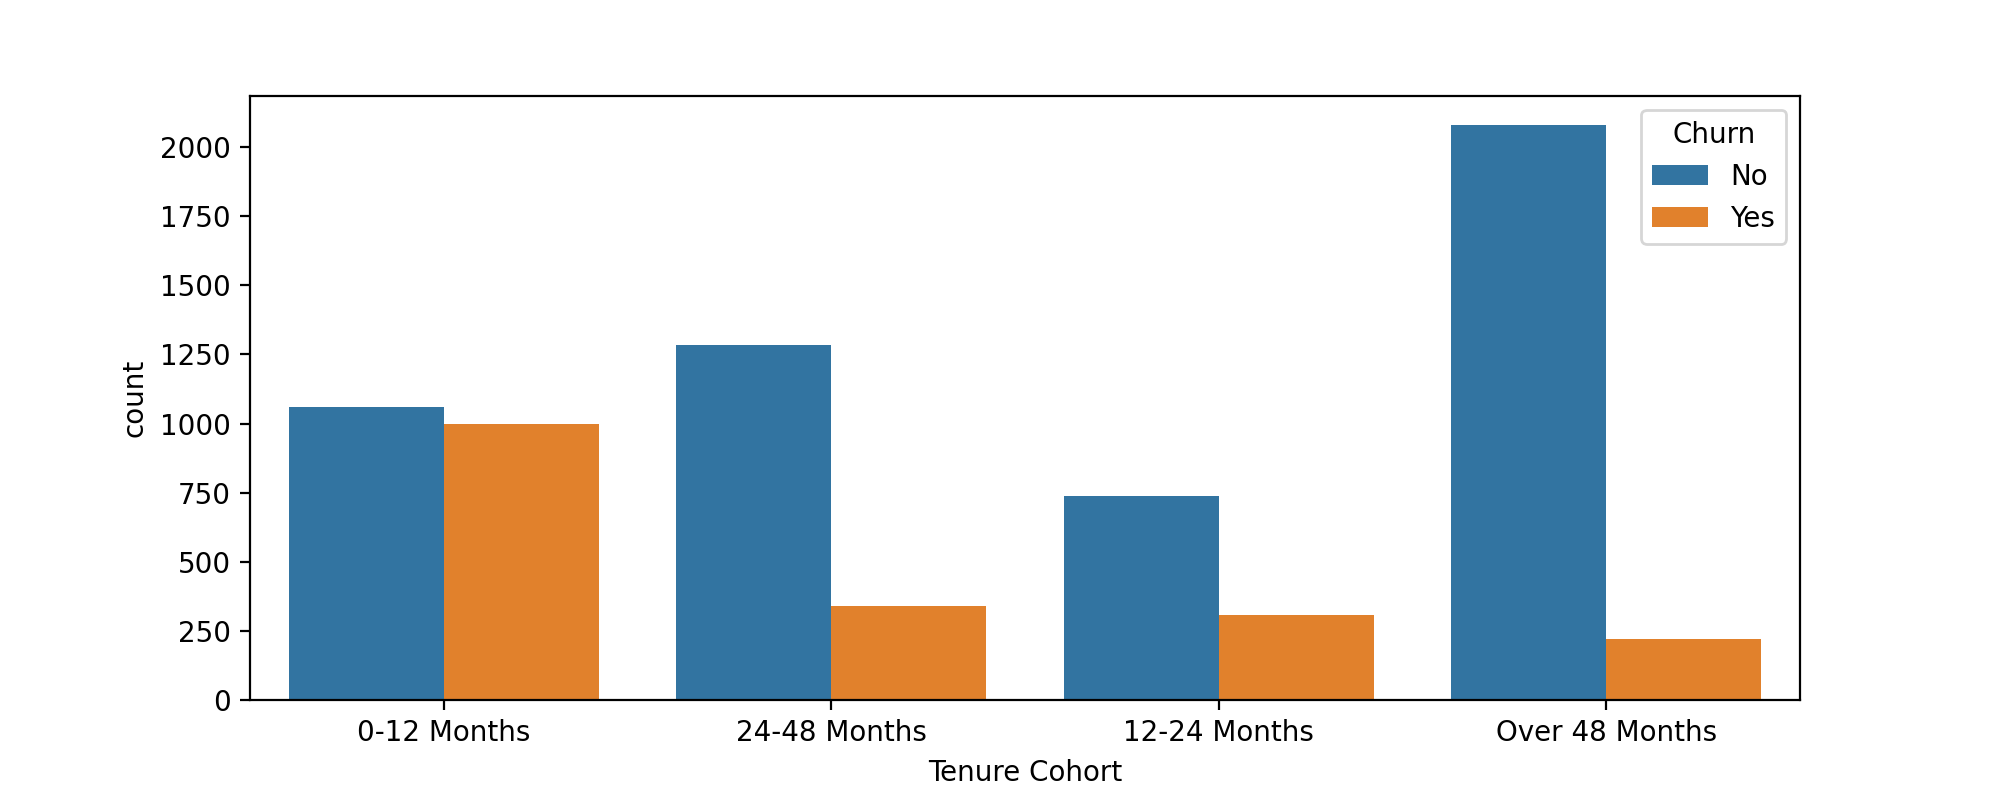<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

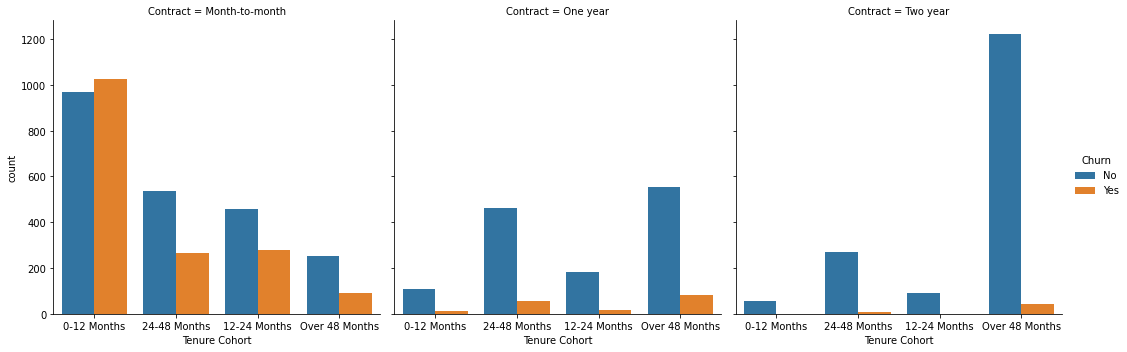

In [ ]:
#CODE HERE
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

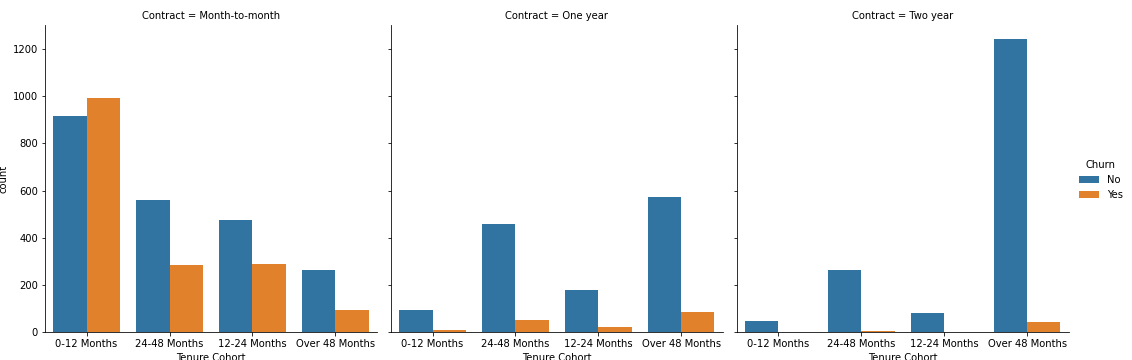<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  Tenure Cohort  
0           Electronic check          29.85        29.85     No    0-12 Months  
1               Mailed check          56.95      1889.50     No   24-48 Months  
2               Mailed check          53.85       108.15    Yes    0-12 Months  
3  Bank transfer (automatic)          42.30      1840.75     No   24-48 Months  
4           Electronic check          70.70       151.65    Yes    0-12 Months  

[5 rows x 22 columns]

In [6]:
#CODE HERE
x = df.drop(['customerID','Churn','Tenure Cohort'],axis=1)
y =df['Churn']

In [7]:
X = pd.get_dummies(x,drop_first=True)

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [8]:
#CODE HERE
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier(max_depth=6)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_preds= dtc.predict(X_test)

In [26]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


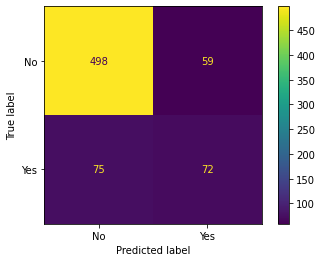

In [ ]:
plot_confusion_matrix(dtc,X_test,y_test)

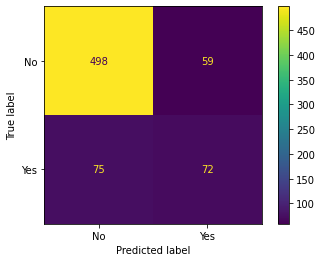

In [ ]:
feat_imp = pd.DataFrame(data=dtc.feature_importances_,index=X.columns,columns=['Feat Imp'])

In [ ]:
feat_imp = feat_imp[feat_imp['Feat Imp']>0]

In [ ]:
feat_imp = feat_imp.sort_values('Feat Imp')

In [ ]:
feat_imp

Feat Imp
gender_Male                          0.001237
OnlineBackup_Yes                     0.005341
PhoneService_Yes                     0.007852
TechSupport_Yes                      0.007868
OnlineSecurity_Yes                   0.008376
Contract_One year                    0.010021
MultipleLines_Yes                    0.012432
SeniorCitizen                        0.012680
StreamingMovies_No internet service  0.026290
Contract_Two year                    0.027065
PaymentMethod_Electronic check       0.034436
MonthlyCharges                       0.044922
TotalCharges                         0.063506
InternetService_Fiber optic          0.314060
tenure                               0.423914

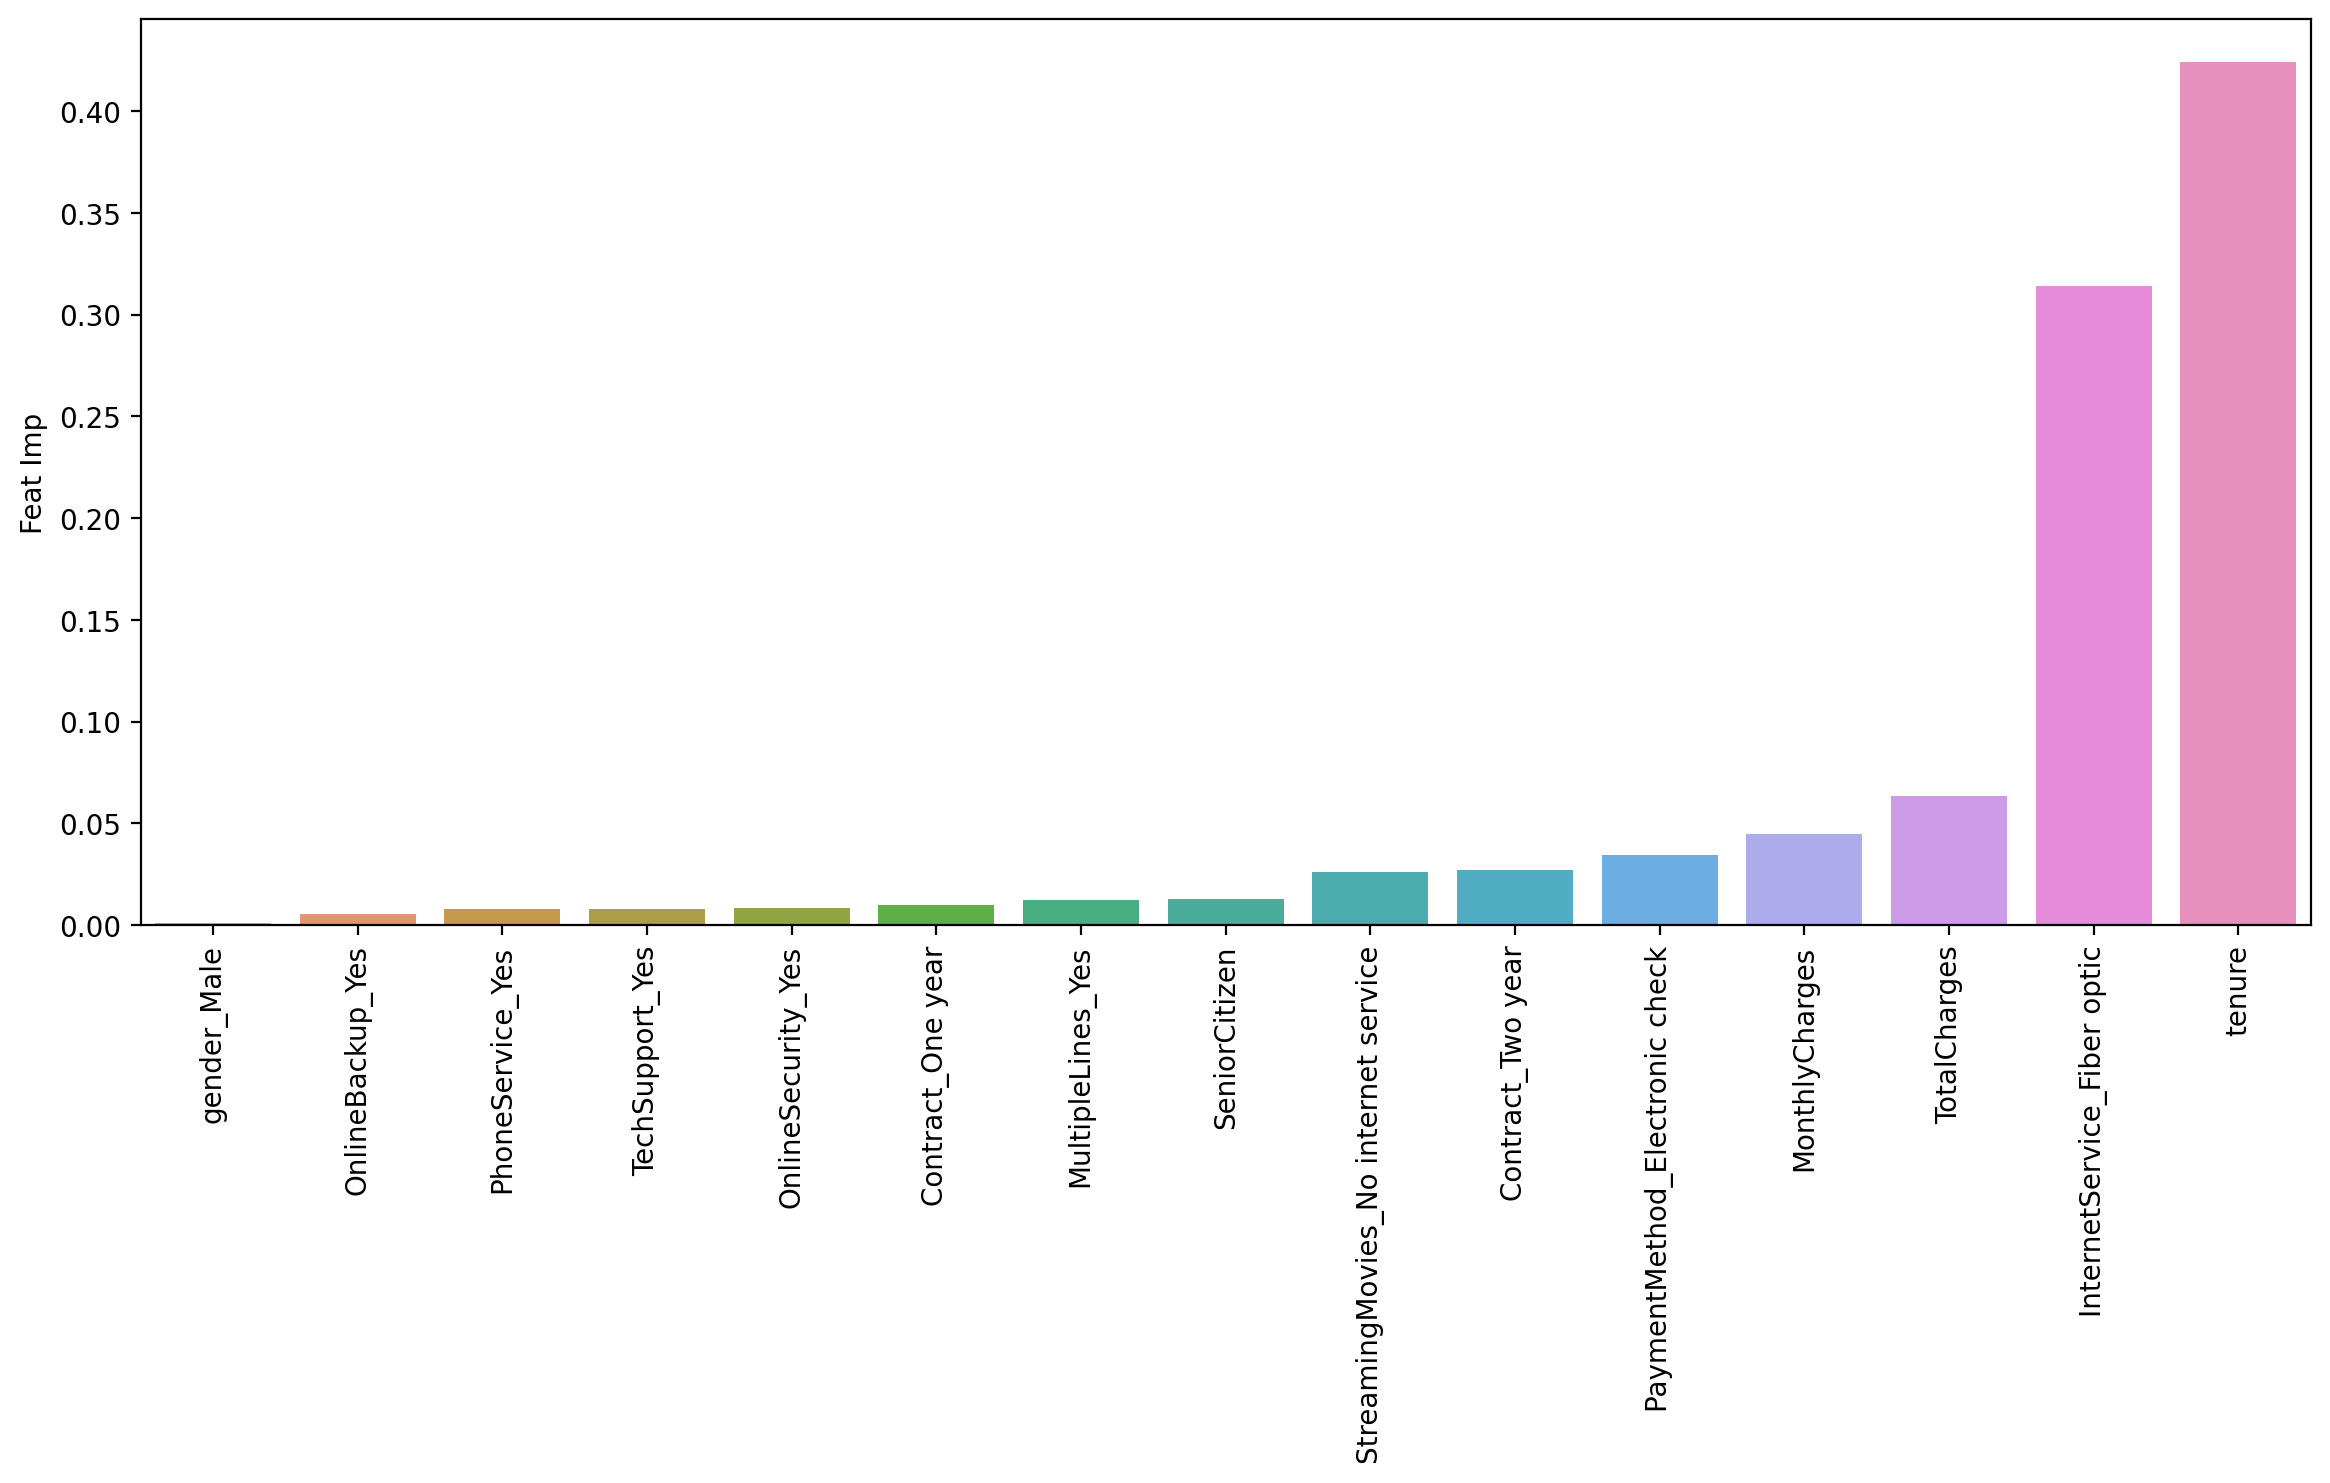

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_imp,x=feat_imp.index,y='Feat Imp')
plt.xticks(rotation=90);

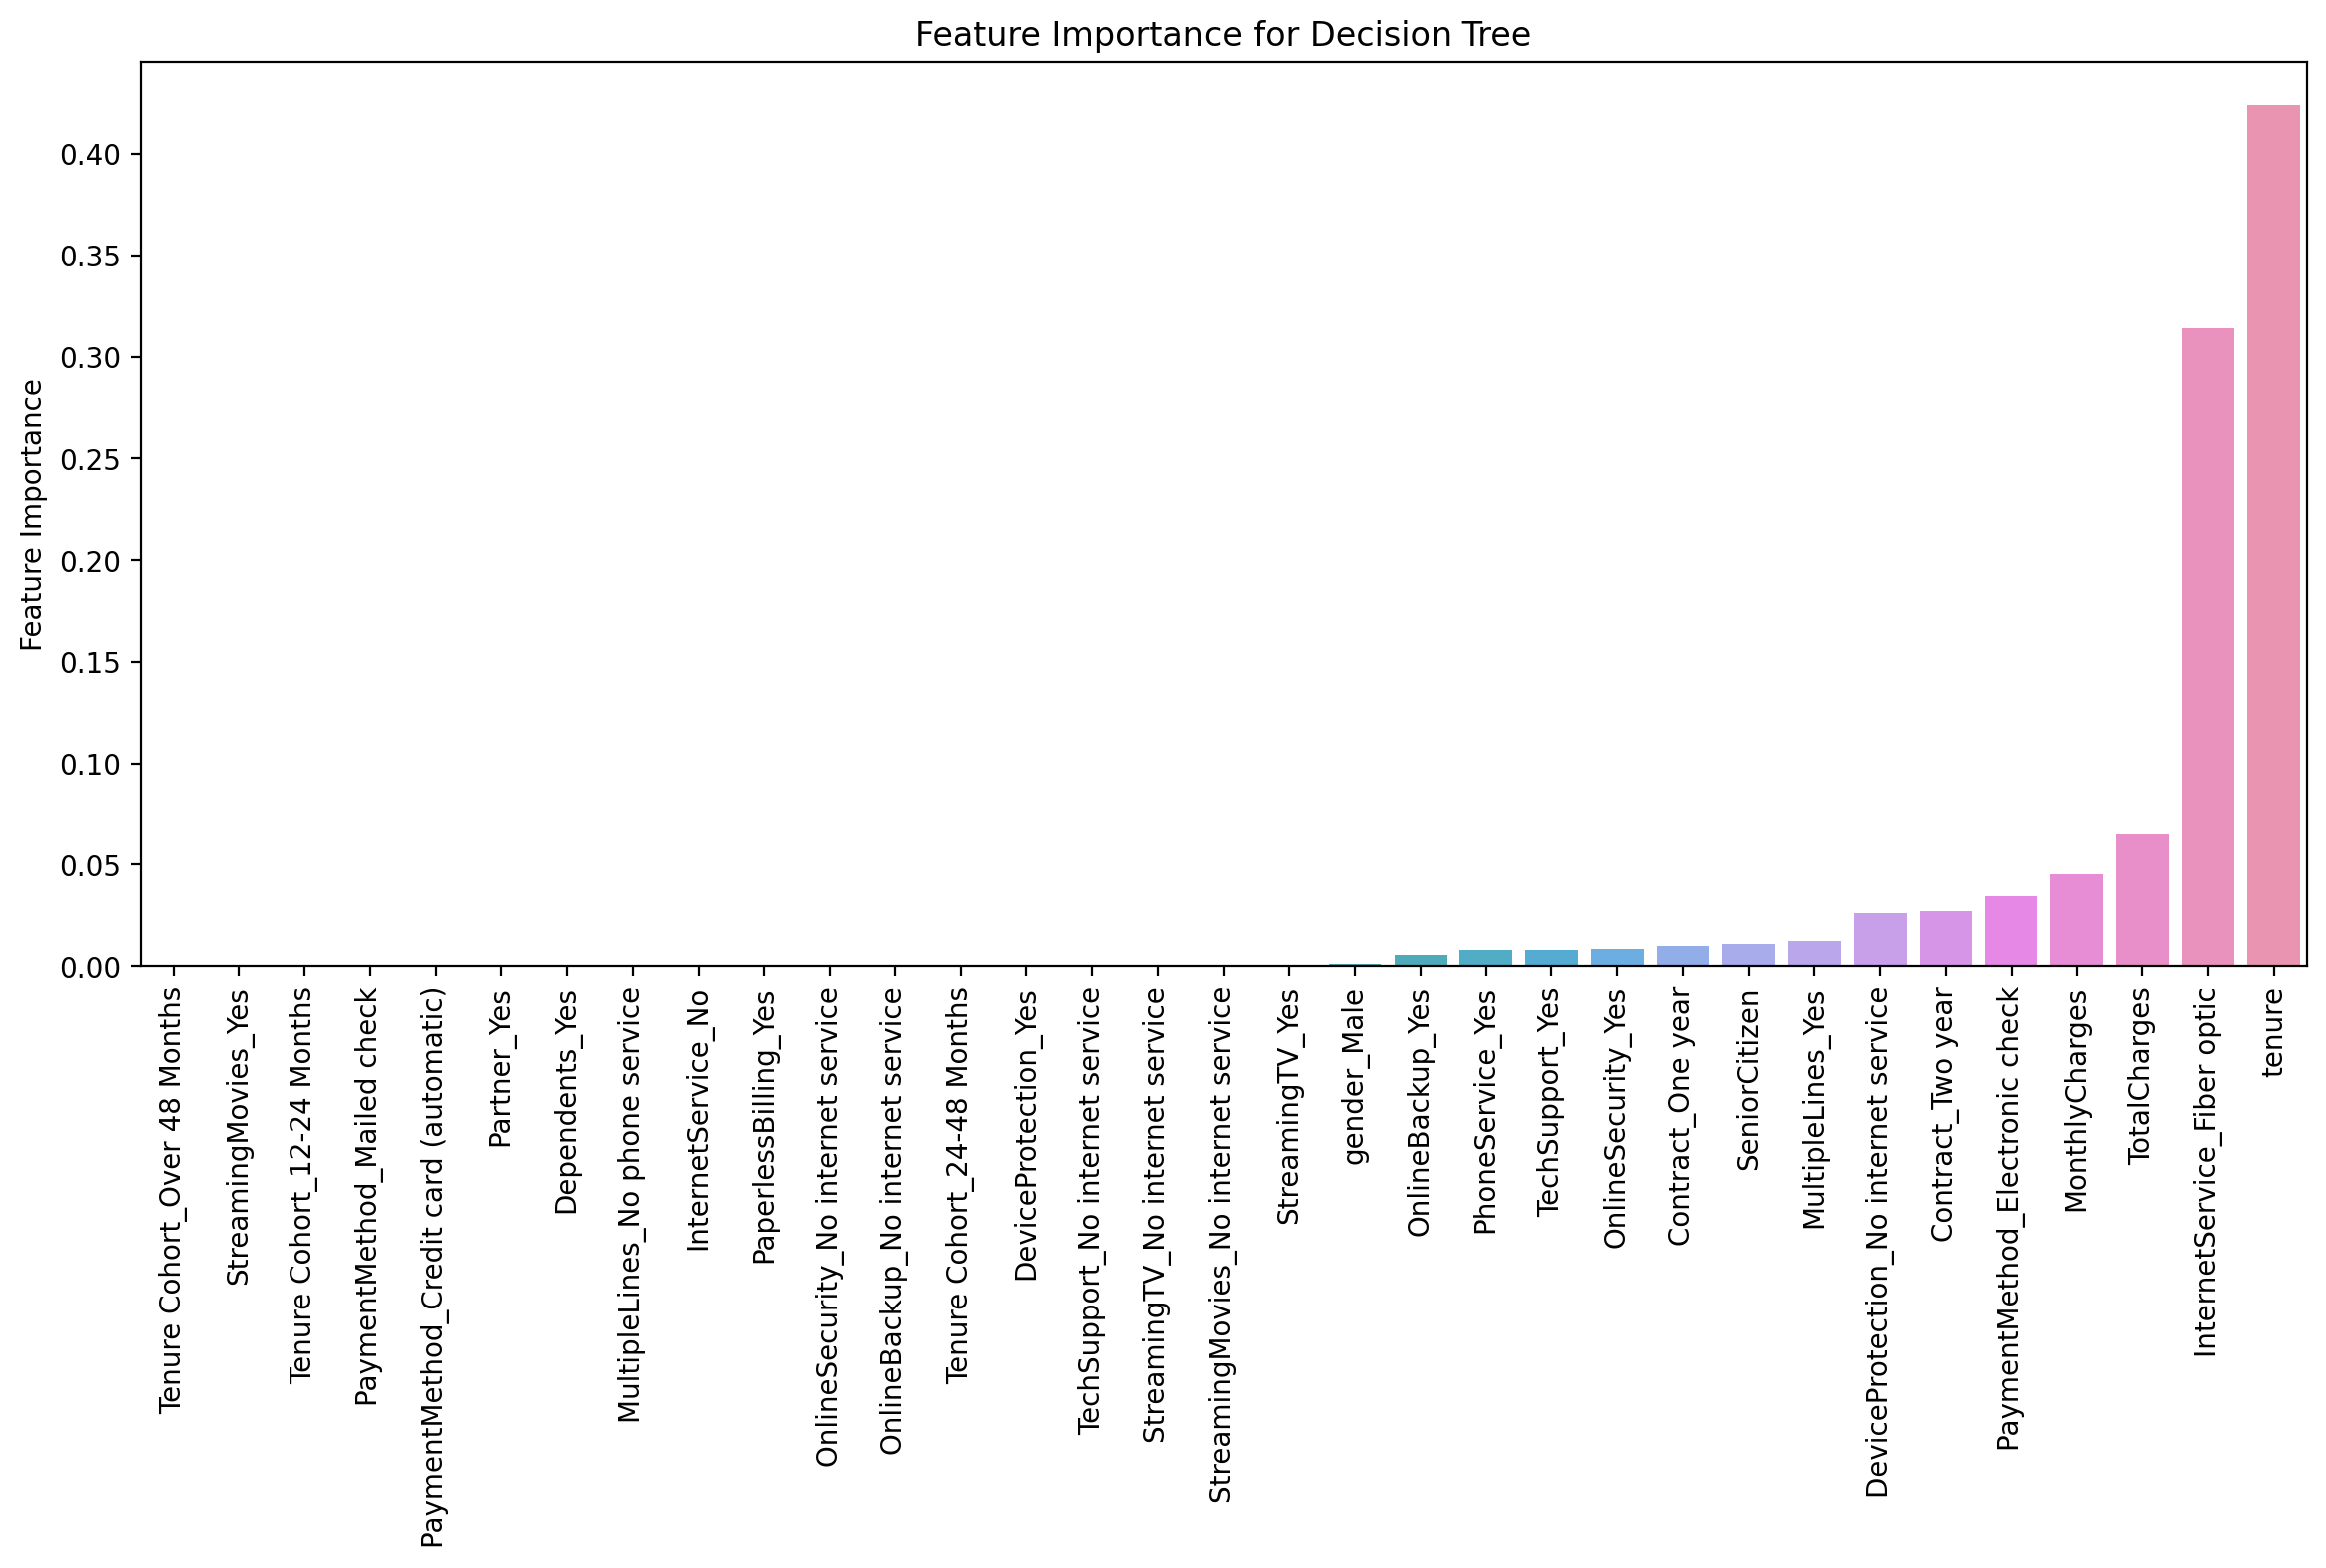

In [ ]:
from sklearn.tree import plot_tree

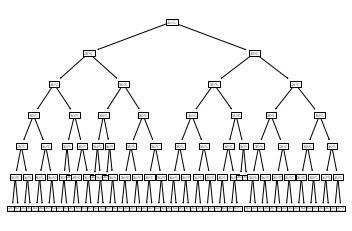

In [ ]:
plot_tree(dtc);

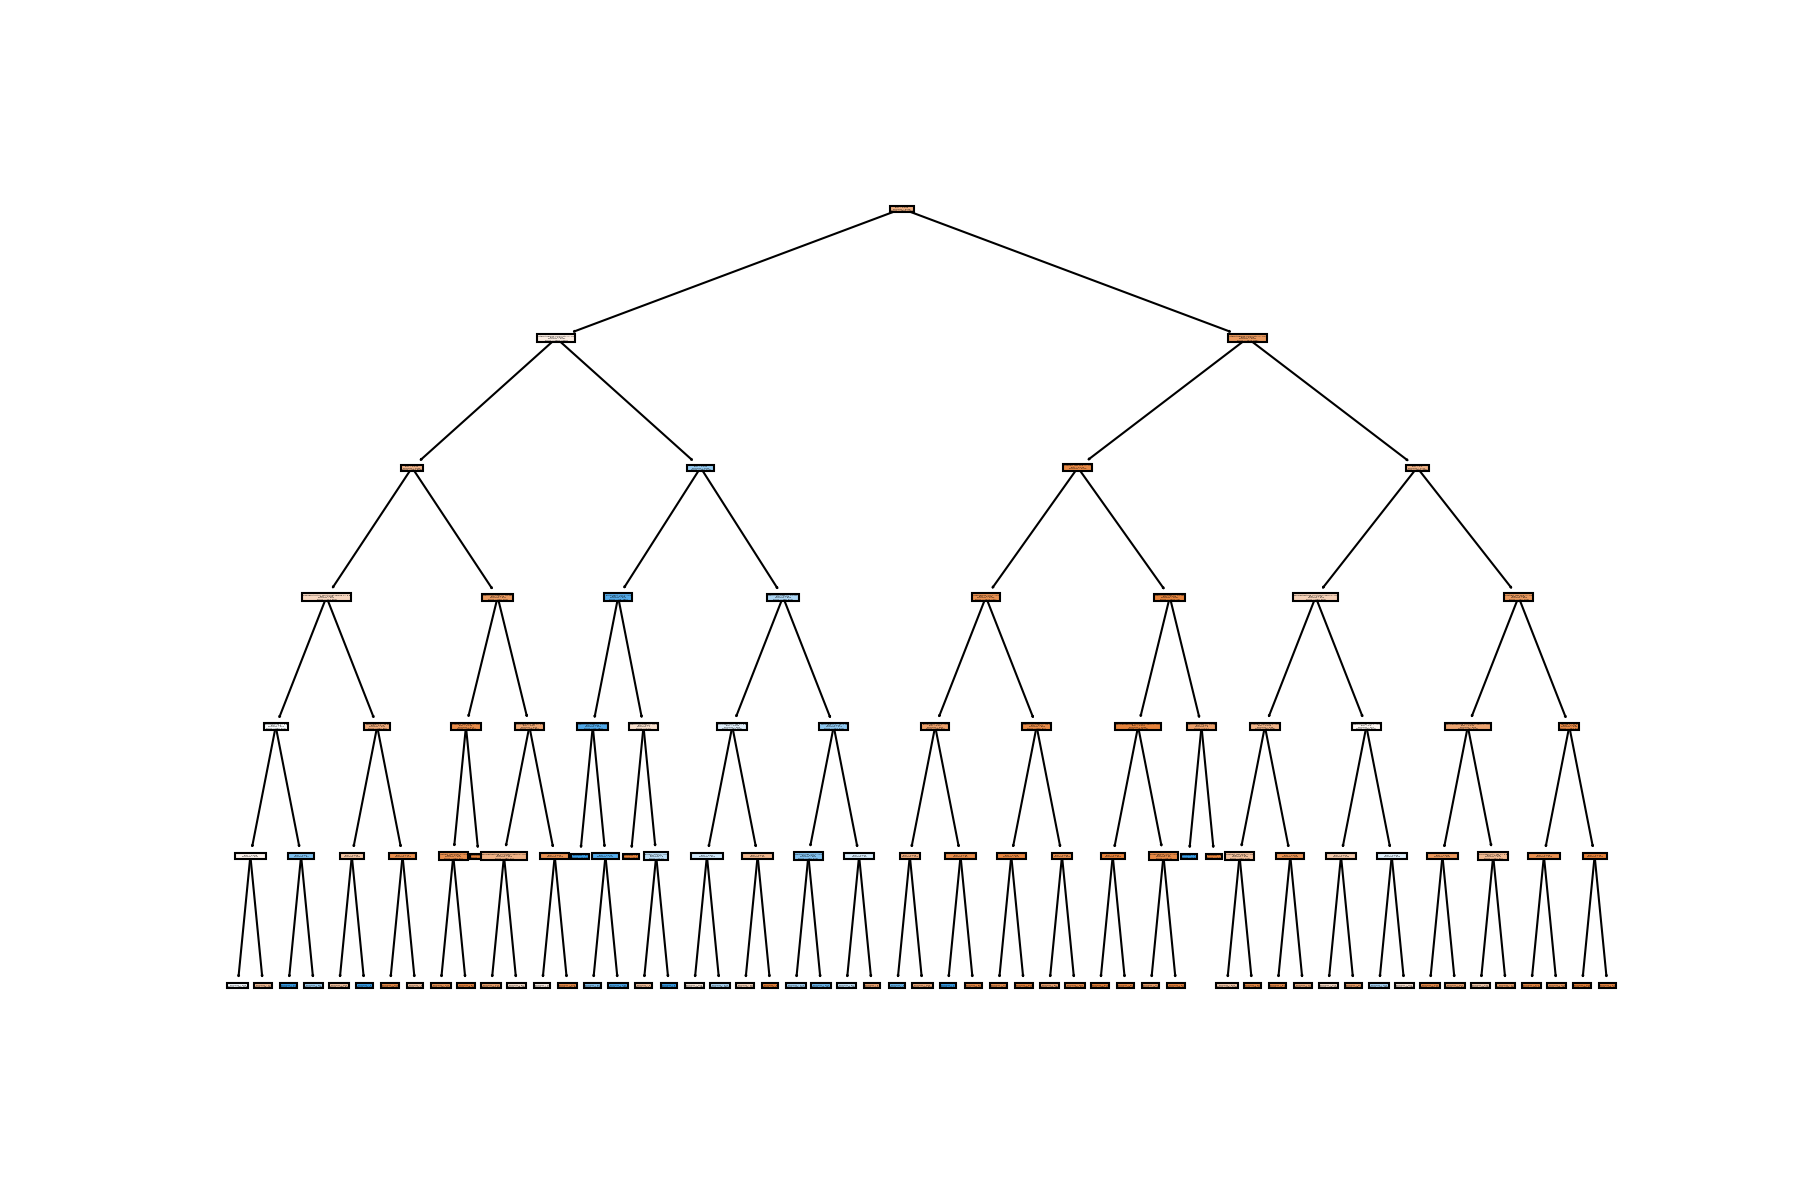<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [10]:
#CODE HERE
from sklearn.ensemble import RandomForestClassifier

In [19]:
n_estimators = [100,128,200,250]
     

max_features = [2,3,4,6]
     

bootstrap = [True,False]
     

oob_score = [True,False]
     

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

In [ ]:
rfc = RandomForestClassifier()

In [20]:
grid = GridSearchCV(rfc,param_grid)
     

grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/p

GridSearchCV(estimator=RandomForestClassifier(max_depth=6),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 6],
                         'n_estimators': [100, 128, 200, 250],
                         'oob_score': [True, False]})

In [21]:
grid.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 200, 'oob_score': True}

In [22]:
rfc = RandomForestClassifier(max_features=6,n_estimators=200)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=200)

In [24]:
preds = rfc.predict(X_test)

In [27]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.79      0.79      0.79       704



              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


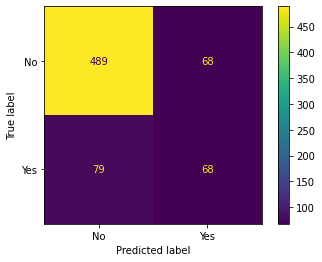

In [28]:
plot_confusion_matrix(rfc,X_test,y_test);

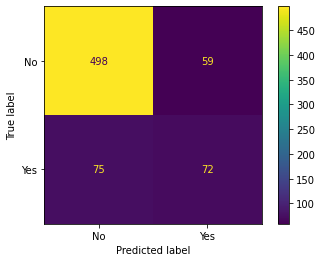

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [ ]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ada_model = AdaBoostClassifier()
gbc_model = GradientBoostingClassifier()

In [ ]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
ada_preds = ada_model.predict(X_test)

In [ ]:
gbc_preds = gbc_model.predict(X_test)

In [ ]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [ ]:
print(classification_report(y_test,gbc_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


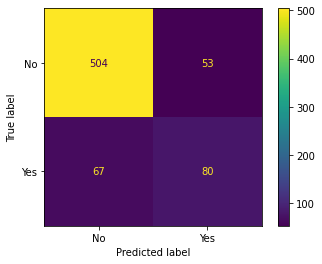

In [ ]:
plot_confusion_matrix(ada_model,X_test,y_test)

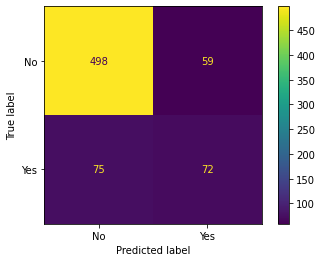

**TASK: Analyze your results, which model performed best for you?**

In [ ]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!